## Exploration of the Jeff Sackmann Point by Point Dataset


#### Initial insights into point by point data and granularity to help understand what sort of questions can be answered

* Senior Thesis
* Fall 2020
* Advisor: Dr. Katy McKeough
* Michael Kolor

### Imports

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# For Output Later:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Reading in Grand Slam Point-by-Point (PbP) Data

# README:

Note: Based off readme, should be ~ 5000 matches in this data directory

**For more, check out Jeff Sackmann's blog The Tennis Abstract http://www.tennisabstract.com/**
******************************************************************
# Grand Slam Point-by-Point Data, 2011-20

This repo contains point-by-point data for most[1] main-draw singles Grand Slam matches since 2011. It was scraped from the four Grand Slam websites shortly after each event.

There are two files for each tournament. "-matches.csv" contain metadata for all the singles matches included from the tournament, and '-points.csv' contains all the available data for each point. Where doubles data is available, men's and women's doubles are in files with suffixes "-matches-doubles.csv" and "-points-doubles.csv." Where mixed doubles data is available, it is in files with suffixes "-matches-mixed.csv" and "-points-mixed.csv."

Unfortunately, much of the most useful data isn't available for every tournament, such as serve speed, first/second serve indicators, and rally length. In some cases, very similar data (such as rally length) does not appear in the same column for every event. On the bright side, there's more data now than a few years ago, with additions such as distance run, serve depth, and return depth.

For even more detailed data, including non-slam matches but not including *all* slam matches, see my Match Charting Project[2].

I'll try to keep this updated after each tournament, but I can't make any promises as to punctuality.

# 'Missing' events

Most of the data in this repo was published by the grand slams as part of IBM's "Slamtracker" feature. Starting in 2018, the Australian Open and French Open no longer worked with IBM. They partnered with Infosys, which now offers a similar "MatchBeats" feature on the AO and FO websites. Much of the data is similar -- serve speeds, 1st/2nd serve indicators, rally lengths, and ace/double fault/winner/unforced error indicators -- though some of IBM's newer features, such as distance run, are not included.

I've transformed the published data from the 2018-20 AO and FO into a format similar to the "Slamtracker" data from other events. Using data from both Slamtracker and MatchBeats events will require attention to which attributes are available for which slams. (As noted above, this is also true for Slamtracker alone, which was not consistent from year to year.) However, I've tried to make this as seamless as possible.

From the 2018-19 AO and FO, there are many matches (especially doubles) in which serve speed and rally length were not recorded. In the original source data, serve speed is always noted as 0, and rally length is 3 or 0. Use of data from those matches would require careful attention to those limitations.

# Doubles

I've added 2018-19 French Open and 2018-20 Australian Open men's, women's, and mixed doubles, with the same limitations as the singles data from those events, as mentioned above. To accommodate doubles, I've added several columns to the 'matches' files for doubles events, such that 'partner1' is the partner of 'player1', and so on. I don't have equivalent doubles data for most of the other slams with singles data included here, but I do have a bit, and I hope to clean that up and include it in the future.

# License

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/Dataset" property="dct:title" rel="dct:type">Tennis databases, files, and algorithms</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://www.tennisabstract.com/" property="cc:attributionName" rel="cc:attributionURL">Jeff Sackmann / Tennis Abstract</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/JeffSackmann" rel="dct:source">https://github.com/JeffSackmann</a>.

In other words: Attribution is required. Non-commercial use only.

---

[1] In general, this data is available for matches on courts with the Hawkeye system installed. The vast majority of missing matches are first-rounders. Many of the more recent events included all matches.

[2] Homepage: http://www.tennisabstract.com/charting/meta.html
Repo: https://github.com/JeffSackmann/tennis_MatchChartingProject

***********************************************************

# DATA DICTIONARY:
************************************************************

* ServeWidth
    + B: Body
    + BC: Body/Center
    + BW: Body/Wide
    + C: Center ["down the T"]
    + W: Wide

* ServeDepth
    + CTL: Close To Line
    + NCTL: Not Close To Line

* ReturnDepth
    + D: Deep
    + ND: Not Deep

* ServeIndicator
    + 1: 1st serve
    + 2: 2nd serve

# Code

# For now, only look at singles, not doubles

### Also upon internet searching and prior knowledge of tennis community, Jeff Sackmann's appears to be the best data available to the public


- 2011-2017 complete, 2018-2020 has less data (but could still be useful depending on the problem
    +  This is due to the loss of rights for the IBM Slamtracker Platform
- it looks like there are no player id's linking the to PBP from 2012 onwards. Can still be done tho.

#### Reading in 'Point by Point' and Corresponding 'Matches' Dataframes

In [15]:
grandslams = ["ausopen", "frenchopen", "wimbledon", "usopen"]

pbp_slams = pd.DataFrame()
tourney_df = [np.nan] * 36

for i, year in enumerate((range(2011, 2020))):
    for j, slam in enumerate(grandslams):
        
        # get index
        index = i * 4 + j
        
        # Get file string names for parsing
        file_string = "{0}-{1}".format(year, slam)
        points_string = file_string + "-points.csv"
        matches_string = file_string + "-matches.csv"
        
        # load df's
        points_df = pd.read_csv("Repos/JeffSackmann/tennis_slam_pointbypoint/{0}".format(points_string))
        matches_df = pd.read_csv("Repos/JeffSackmann/tennis_slam_pointbypoint/{0}".format(matches_string))
        
        # combine
        tourney_df[index] = pd.merge(points_df, matches_df[["match_id", "player1", "player2"]], on = "match_id")

In [16]:
# concatenate df's
tourney_df = pd.concat(tourney_df, sort = False)

**Exploration**

In [17]:
print("Total Number of Points tracked from 2011-2019: \033[1m{:,}\033[0m".format(len(tourney_df)))
print("Total Number of Matches tracked from 2011-2019: \033[1m{:,}\033[0m".format(len(tourney_df.match_id.unique())))
print("Average points per grand slam match (men's and women's) from 2011-2019: \033[1m{:.2f}\033[0m".format(len(tourney_df)/len(tourney_df.match_id.unique())))

Total Number of Points tracked from 2011-2019: 1,317,309
Total Number of Matches tracked from 2011-2019: 7,228
Average points per grand slam match (men's and women's) from 2011-2019: 182.25


**Looking at Columns**

In [18]:
tourney_df.columns

Index(['match_id', 'ElapsedTime', 'SetNo', 'P1GamesWon', 'P2GamesWon',
       'SetWinner', 'GameNo', 'GameWinner', 'PointNumber', 'PointWinner',
       'PointServer', 'Speed_KMH', 'Rally', 'P1Score', 'P2Score', 'P1Momentum',
       'P2Momentum', 'P1PointsWon', 'P2PointsWon', 'P1Ace', 'P2Ace',
       'P1Winner', 'P2Winner', 'P1DoubleFault', 'P2DoubleFault', 'P1UnfErr',
       'P2UnfErr', 'P1NetPoint', 'P2NetPoint', 'P1NetPointWon',
       'P2NetPointWon', 'P1BreakPoint', 'P2BreakPoint', 'P1BreakPointWon',
       'P2BreakPointWon', 'P1FirstSrvIn', 'P2FirstSrvIn', 'P1FirstSrvWon',
       'P2FirstSrvWon', 'P1SecondSrvIn', 'P2SecondSrvIn', 'P1SecondSrvWon',
       'P2SecondSrvWon', 'P1ForcedError', 'P2ForcedError', 'History',
       'Speed_MPH', 'P1BreakPointMissed', 'P2BreakPointMissed',
       'ServeIndicator', 'P1TurningPoint', 'P2TurningPoint', 'player1',
       'player2', 'Serve_Direction', 'Winner_FH', 'Winner_BH', 'ServingTo',
       'ServeNumber', 'WinnerType', 'WinnerShotType', 'P1

## Missingness/Nulls

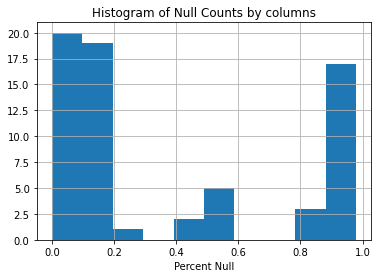

In [19]:
tourney_df.isna().mean().hist()
plt.title("Histogram of Null Counts by columns")
plt.xlabel("Percent Null");

In [20]:
print("\033[1mColumns w/ >90% Missingness:\n \033[0m{}".format(tourney_df.columns[tourney_df.isna().mean() > 0.9]))

Columns w/ >90% Missingness:
 Index(['Rally', 'P1FirstSrvIn', 'P2FirstSrvIn', 'P1FirstSrvWon',
       'P2FirstSrvWon', 'P1SecondSrvIn', 'P2SecondSrvIn', 'P1SecondSrvWon',
       'P2SecondSrvWon', 'P1ForcedError', 'P2ForcedError', 'P1TurningPoint',
       'P2TurningPoint', 'Serve_Direction', 'Winner_FH', 'Winner_BH',
       'ServingTo'],
      dtype='object')


**Exploration of Turning Point, other columns all look unsalvageable**

- **Could be used as a validation sample**

In [21]:
distr_data = tourney_df[["P2TurningPoint", "Rally"]].groupby("P2TurningPoint").count()

In [22]:
tourney_df.P2TurningPoint.isna().sum()

1193701

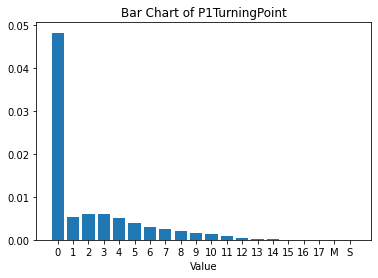

In [23]:
distr_data = tourney_df[["P2TurningPoint", "Rally"]].groupby("P2TurningPoint").count() / len(tourney_df)


plt.bar(x = distr_data.index.values.astype("str"),  height = distr_data["Rally"])
plt.title("Bar Chart of P1TurningPoint");
plt.xlabel("Value");

In [24]:
# Drop columns with more than 90% missingness
tourney_df_filt = tourney_df.drop(columns=['Rally', 'P1FirstSrvIn', 'P2FirstSrvIn', 'P1FirstSrvWon',
       'P2FirstSrvWon', 'P1SecondSrvIn', 'P2SecondSrvIn', 'P1SecondSrvWon',
       'P2SecondSrvWon', 'P1ForcedError', 'P2ForcedError', 'P1TurningPoint',
       'P2TurningPoint', 'Serve_Direction', 'Winner_FH', 'Winner_BH',
       'ServingTo'])

**Continue to Inspect Missingness**

In [28]:
print("\033[1mColumns w/ >60% Missingness:\n \033[0m{}".format(tourney_df_filt.columns[tourney_df_filt.isna().mean() > 0.6]))

Columns w/ >60% Missingness:
 Index(['ServeWidth', 'ServeDepth', 'ReturnDepth'], dtype='object')


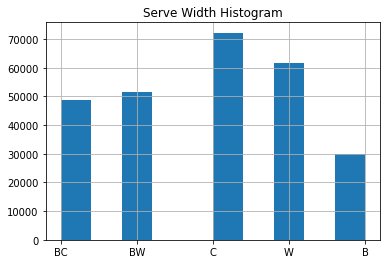

In [36]:
tourney_df_filt.ServeWidth.hist()
plt.title("Serve Width Histogram");

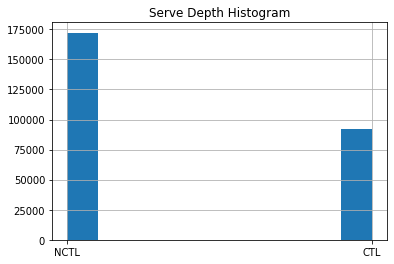

In [37]:
tourney_df_filt.ServeDepth.hist()
plt.title("Serve Depth Histogram");

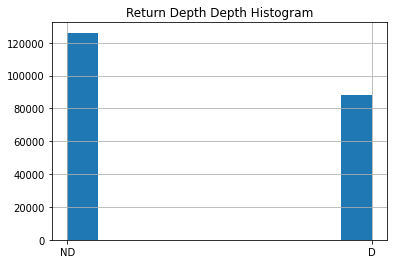

In [38]:
tourney_df_filt.ReturnDepth.hist()
plt.title("Return Depth Depth Histogram");

**Drop Columns not meeting 60% threshold Again**

In [39]:
tourney_df_60filt = tourney_df_filt.drop(columns = tourney_df_filt.columns[tourney_df_filt.isna().mean() > 0.6])

**Re-observe Missingness**

Text(0.5, 1.0, 'COlumn Missingness: 60% Threshold')

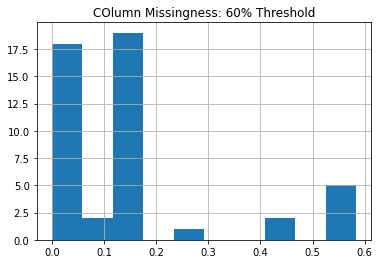

In [43]:
tourney_df_60filt.isna().mean().hist();
plt.title("COlumn Missingness: 60% Threshold")

**Plot Data Missingness by Year**

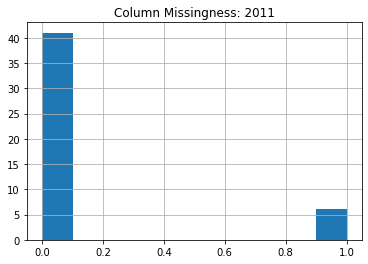

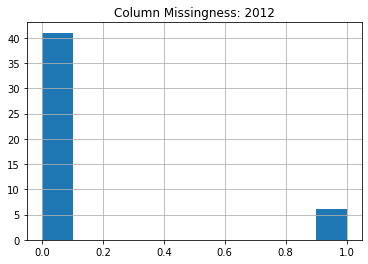

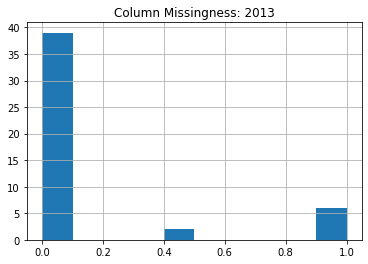

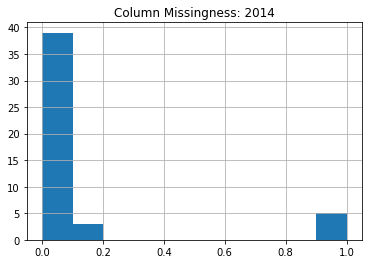

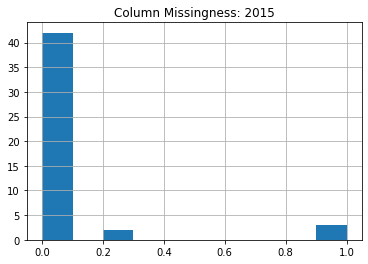

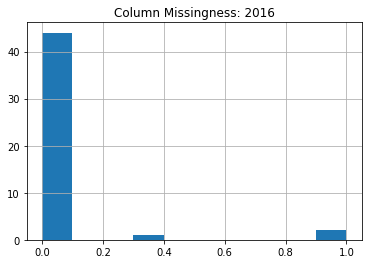

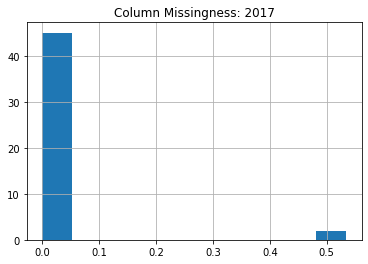

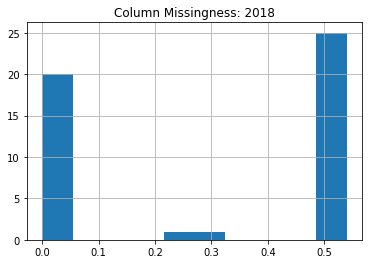

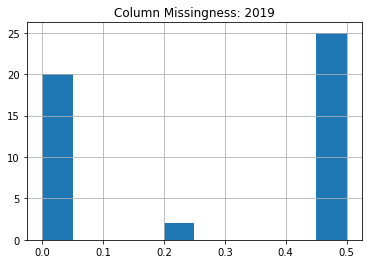

In [48]:
# Plot hisgor
for year in range(2011,2020):
    year_str = "{}".format(year)
    tourney_df_60filt[tourney_df_60filt.match_id.str.contains(year_str)].isna().mean().hist();
    plt.title("Column Missingness: {}".format(year_str))
    plt.show();

# Notice the Big Loss in Data After 2017 ^^ 
# Marks the end of IBM Slamtracker

**2017 Missingness (0.3 threshold)**

In [56]:
tourney_df_60filt.columns[tourney_df_60filt[tourney_df_60filt.match_id.str.contains("2017")].isna().mean() > 0.3]

Index(['P1Momentum', 'P2Momentum'], dtype='object')

**2018 Missingness (0.3 threshold)**

**These columns suffer from high missingness after 2017 (~50%):**

In [63]:
print(tourney_df_60filt.columns[tourney_df_60filt[tourney_df_60filt.match_id.str.contains("2018")].isna().mean() > 0.5])

Index(['ElapsedTime', 'P1GamesWon', 'P2GamesWon', 'SetWinner', 'GameWinner',
       'P1Momentum', 'P2Momentum', 'P1PointsWon', 'P2PointsWon', 'P1NetPoint',
       'P2NetPoint', 'P1NetPointWon', 'P2NetPointWon', 'P1BreakPoint',
       'P2BreakPoint', 'P1BreakPointWon', 'P2BreakPointWon', 'History',
       'P1BreakPointMissed', 'P2BreakPointMissed', 'ServeIndicator',
       'WinnerType', 'WinnerShotType', 'P1DistanceRun', 'P2DistanceRun'],
      dtype='object')


### For Rest of Exploration, Partition 2011-2017 and 2018-2019 Grand Slam dataframes

In [75]:
# Partition
df_11_17 = [np.nan] * 7
df_18_19 = [np.nan] * 2

for i, year in enumerate(range(2011, 2018)):
    df_11_17[i] = tourney_df_60filt[tourney_df_60filt.match_id.str.contains(str(year))]

for i, year in enumerate(range(2018, 2020)):
    df_18_19[i] = tourney_df_60filt[tourney_df_60filt.match_id.str.contains(str(year))]
        
df_11_17 = pd.concat(df_11_17)
df_18_19 = pd.concat(df_18_19)

In [76]:
print("\033[1mColumns: \033[0m {}".format(df_11_17.columns))

Columns:  Index(['match_id', 'ElapsedTime', 'SetNo', 'P1GamesWon', 'P2GamesWon',
       'SetWinner', 'GameNo', 'GameWinner', 'PointNumber', 'PointWinner',
       'PointServer', 'Speed_KMH', 'P1Score', 'P2Score', 'P1Momentum',
       'P2Momentum', 'P1PointsWon', 'P2PointsWon', 'P1Ace', 'P2Ace',
       'P1Winner', 'P2Winner', 'P1DoubleFault', 'P2DoubleFault', 'P1UnfErr',
       'P2UnfErr', 'P1NetPoint', 'P2NetPoint', 'P1NetPointWon',
       'P2NetPointWon', 'P1BreakPoint', 'P2BreakPoint', 'P1BreakPointWon',
       'P2BreakPointWon', 'History', 'Speed_MPH', 'P1BreakPointMissed',
       'P2BreakPointMissed', 'ServeIndicator', 'player1', 'player2',
       'ServeNumber', 'WinnerType', 'WinnerShotType', 'P1DistanceRun',
       'P2DistanceRun', 'RallyCount'],
      dtype='object')


In [77]:
# Print head
df_11_17.head(20)

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,...,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
0,2011-ausopen-1101,00:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,...,0.0,0.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-ausopen-1101,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,...,0.0,2.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-ausopen-1101,0:00:23,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,...,0.0,2.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-ausopen-1101,0:00:59,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,...,0.0,2.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-ausopen-1101,0:01:57,1.0,1.0,0.0,0.0,1.0,1.0,4,1.0,...,0.0,1.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-ausopen-1101,0:03:23,1.0,1.0,0.0,0.0,2.0,0.0,5,1.0,...,0.0,1.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-ausopen-1101,0:04:04,1.0,1.0,0.0,0.0,2.0,0.0,6,1.0,...,0.0,1.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-ausopen-1101,0:04:27,1.0,1.0,0.0,0.0,2.0,0.0,7,2.0,...,0.0,1.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-ausopen-1101,0:05:01,1.0,1.0,0.0,0.0,2.0,0.0,8,1.0,...,0.0,1.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-ausopen-1101,0:05:21,1.0,1.0,0.0,0.0,2.0,0.0,9,2.0,...,0.0,1.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN


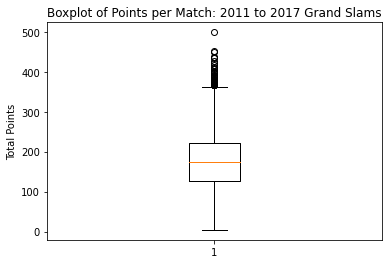

In [79]:
plt.boxplot(x = df_11_17.groupby("match_id").size())
plt.title("Boxplot of Points per Match: 2011 to 2017 Grand Slams");
plt.ylabel("Total Points");

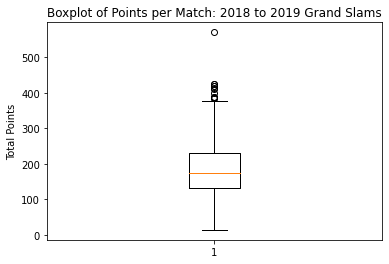

In [80]:
plt.boxplot(x = df_18_19.groupby("match_id").size())
plt.title("Boxplot of Points per Match: 2018 to 2019 Grand Slams");
plt.ylabel("Total Points");

# Print point Summaries, 1st Percentile Value

In [98]:
df_11_17.groupby("match_id").size().describe()

count    5279.000000
mean      180.966471
std        68.653748
min         4.000000
25%       126.000000
50%       173.000000
75%       221.000000
max       499.000000
dtype: float64

In [83]:
df_18_19.groupby("match_id").size().describe()

count    1949.000000
mean      185.729605
std        70.091684
min        14.000000
25%       132.000000
50%       173.000000
75%       230.000000
max       571.000000
dtype: float64

In [93]:
df_11_17.groupby("match_id").size().quantile(0.01)

68.0

In [94]:
df_18_19.groupby("match_id").size().quantile(0.01)

79.48

## A few other visuals

**Serve Numbers**

In [110]:
print("it appears 2013ish to 2017 even has Serve Numbers! Total missingness: {:.4f}".format(
    df_11_17.iloc[int(len(df_11_17)/2.5):, :]["ServeNumber"].isna().mean()))

it appears 2013ish to 2017 even has Serve Numbers! Total missingness: 0.0002


In [117]:
print("it appears 2018 to 2019 even has Serve Numbers! Total missingness: {:.4f}".format(
    df_18_19["ServeNumber"].isna().mean()))

it appears 2018 to 2019 even has Serve Numbers! Total missingness: 0.0000


**ServeNumber**

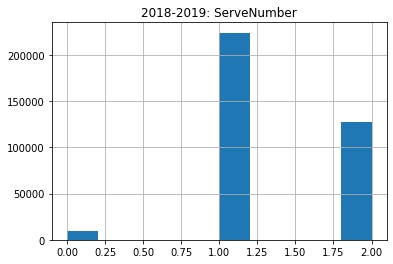

In [121]:
df_18_19.ServeNumber.hist();
plt.title("2018-2019: ServeNumber");

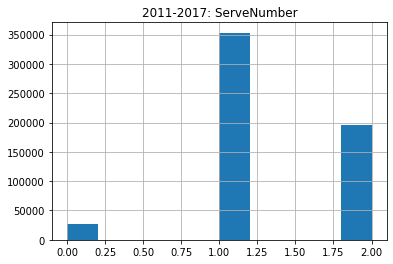

In [122]:
df_11_17.ServeNumber.hist();
plt.title("2011-2017: ServeNumber");

**Columns Available:**

In [151]:
"""'match_id', 'ElapsedTime', 'SetNo', 'P1GamesWon', 'P2GamesWon',
       'SetWinner', 'GameNo', 'GameWinner', 'PointNumber', 'PointWinner',
       'PointServer', 'Speed_KMH', 'P1Score', 'P2Score', 'P1Momentum',
       'P2Momentum', 'P1PointsWon', 'P2PointsWon', 'P1Ace', 'P2Ace',
       'P1Winner', 'P2Winner', 'P1DoubleFault', 'P2DoubleFault', 'P1UnfErr',
       'P2UnfErr', 'P1NetPoint', 'P2NetPoint', 'P1NetPointWon',
       'P2NetPointWon', 'P1BreakPoint', 'P2BreakPoint', 'P1BreakPointWon',
       'P2BreakPointWon', 'History', 'Speed_MPH', 'P1BreakPointMissed',
       'P2BreakPointMissed', 'ServeIndicator', 'player1', 'player2',
       'ServeNumber', 'WinnerType', 'WinnerShotType', 'P1DistanceRun',
       'P2DistanceRun', 'RallyCount'""";


**Explore a Bunch of columns at once (Full-Match)**

**2011-2017**

In [149]:
barplot_cols_to_inspect = ['P1Ace','WinnerType', 'WinnerShotType']

for i in range(3):
    data = df_11_17[barplot_cols_to_inspect].groupby(barplot_cols_to_inspect[i]).size() / len(df_11_17)
    
    print(data)
    print()
    #ax.bar(x = barplot_cols_to_inspect[i]]
    

P1Ace
0.0    0.966554
1.0    0.033444
dtype: float64

WinnerType
0    0.594271
S    0.007686
dtype: float64

WinnerShotType
0    0.453378
B    0.049841
F    0.098738
dtype: float64



/home/michaelkolor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


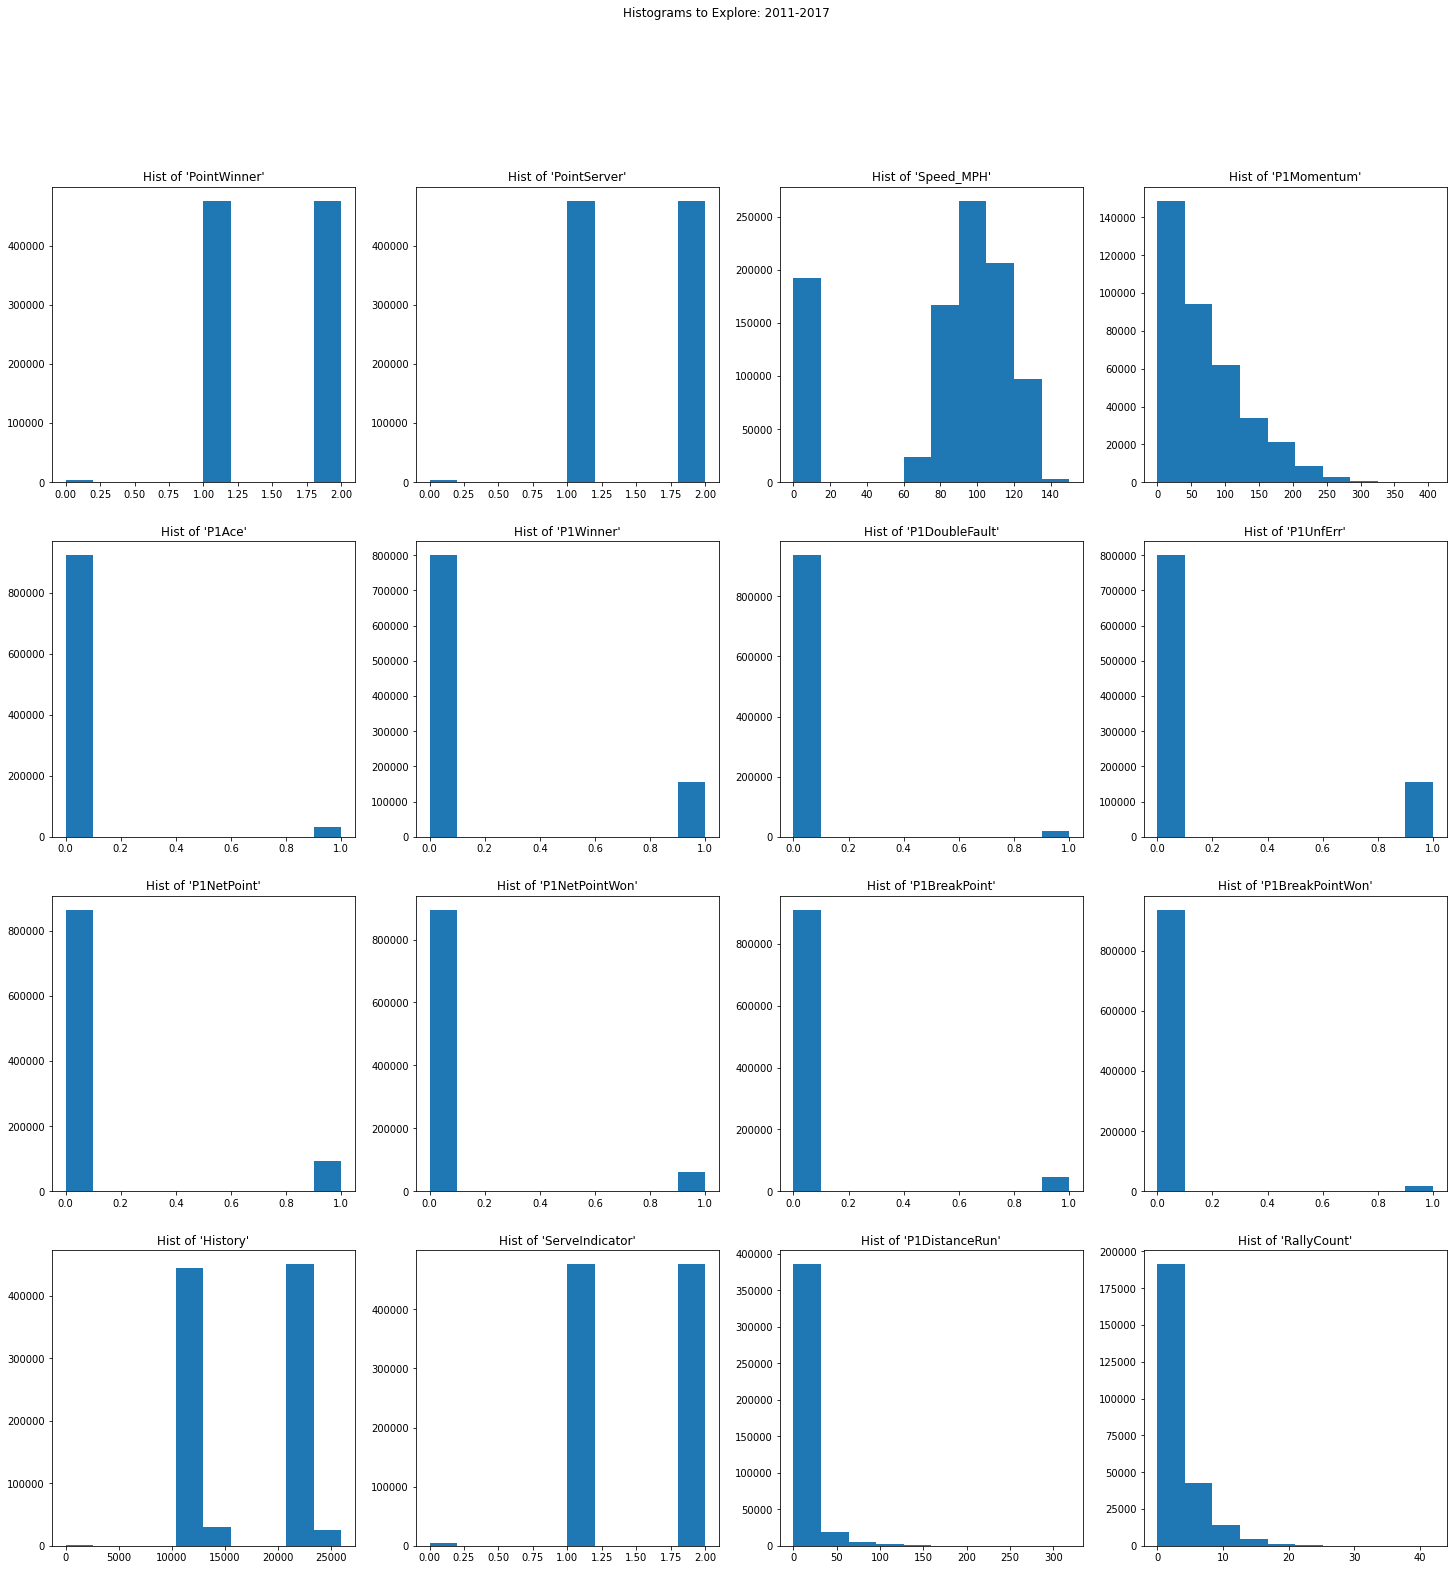

In [147]:
hist_cols_to_inspect = ['PointWinner', 'PointServer', 'Speed_MPH', 'P1Momentum', 'P1Ace', 'P1Winner',
                   'P1DoubleFault', 'P1UnfErr', 'P1NetPoint', 'P1NetPointWon', 'P1BreakPoint',
                  'P1BreakPointWon', 'History', 'ServeIndicator', 'P1DistanceRun',
                  'RallyCount']




fig, ax = plt.subplots(4,4, figsize = (25, 25))

for i in range(16):
    x = int(i / 4)
    y = i % 4
    
    ax[x][y].hist(df_11_17[hist_cols_to_inspect[i]])
    ax[x][y].set_title("Hist of '{}'".format(hist_cols_to_inspect[i]))
fig.show()
fig.suptitle("Histograms to Explore: 2011-2017");

**2018-2019**

In [152]:
barplot_cols_to_inspect = ['P1Ace','WinnerType', 'WinnerShotType']

for i in range(3):
    data = df_18_19[barplot_cols_to_inspect].groupby(barplot_cols_to_inspect[i]).size() / len(df_18_19)
    
    print(data)
    print()
    #ax.bar(x = barplot_cols_to_inspect[i]]
    

P1Ace
0.0    0.965358
1.0    0.034642
dtype: float64

WinnerType
0    0.479492
S    0.006906
dtype: float64

WinnerShotType
0    0.372955
B    0.038366
F    0.075077
dtype: float64



/home/michaelkolor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


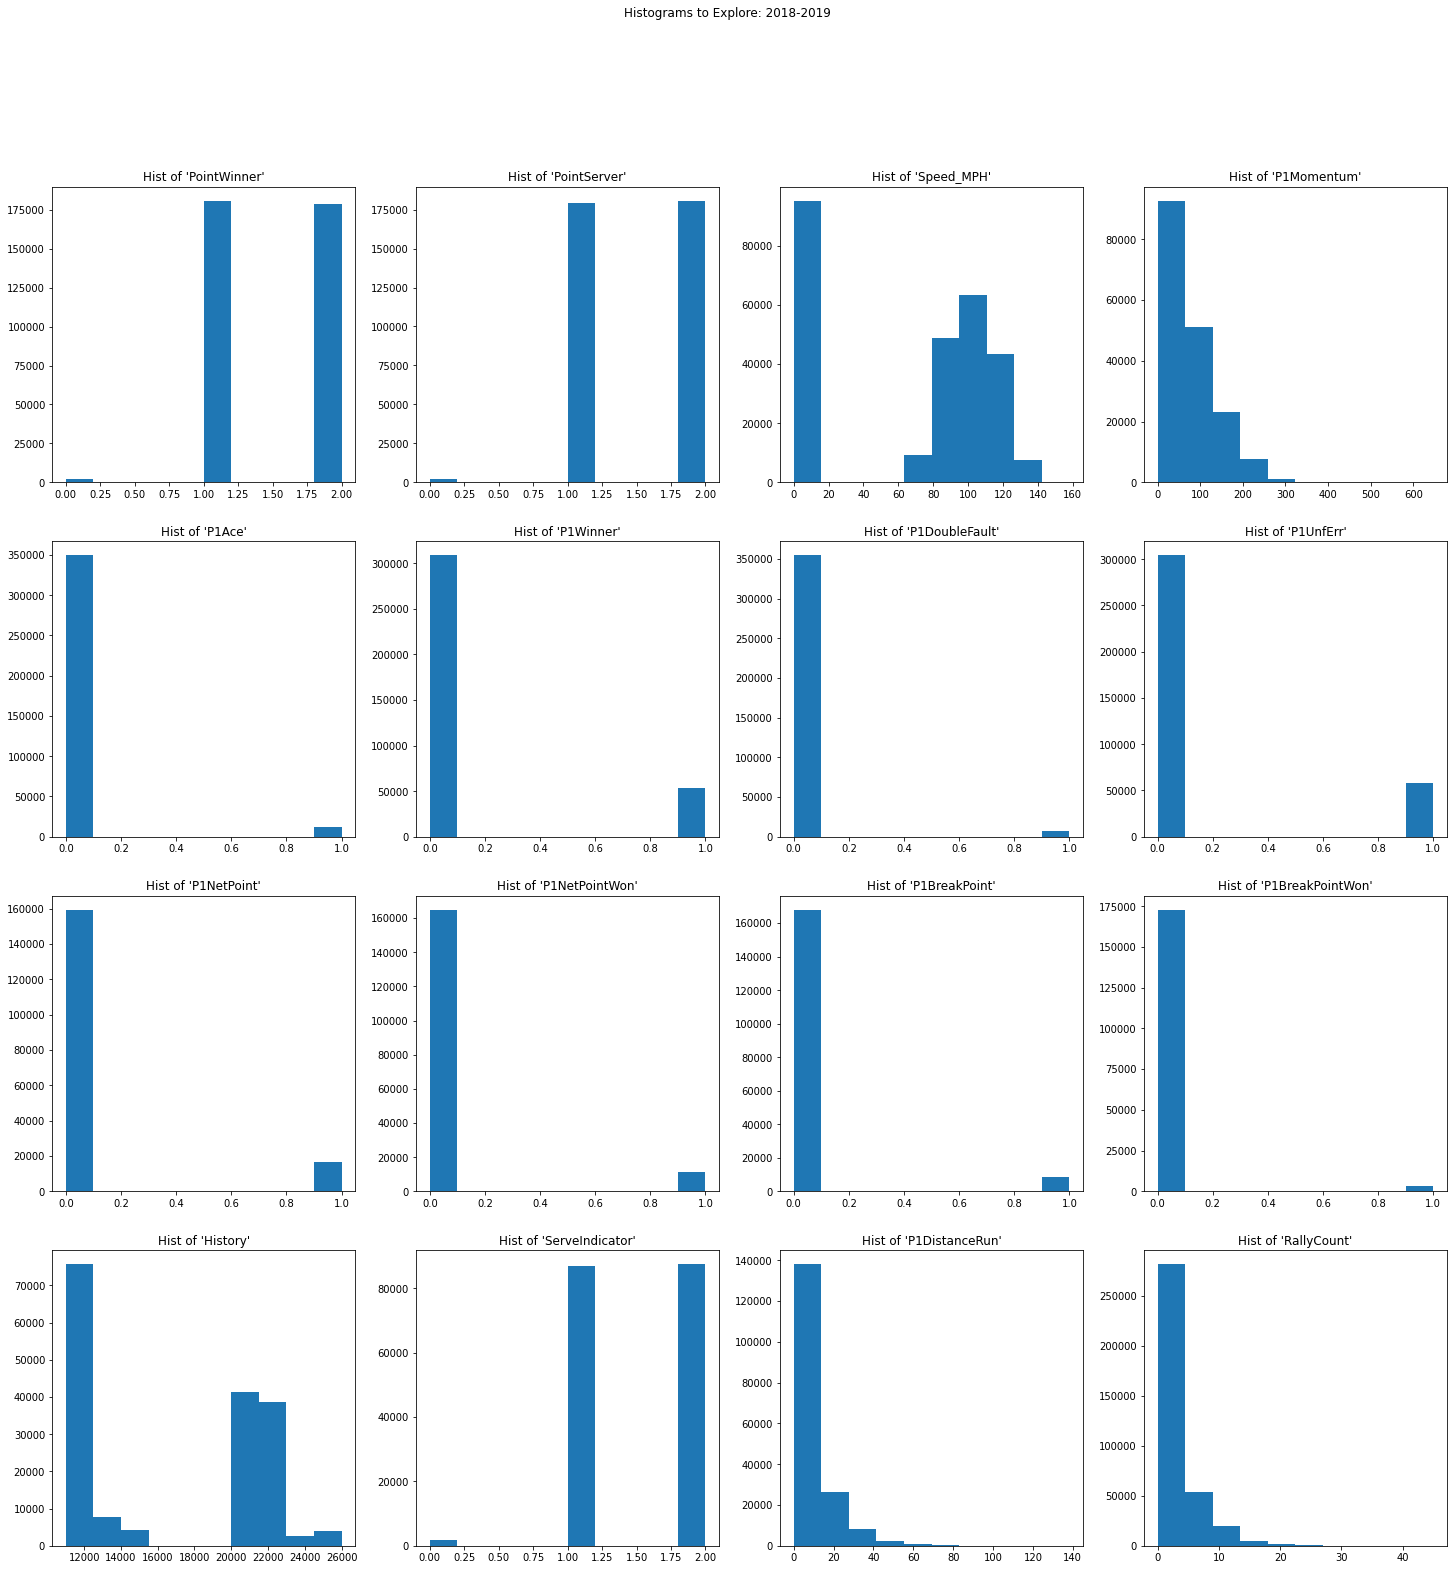

In [153]:
hist_cols_to_inspect = ['PointWinner', 'PointServer', 'Speed_MPH', 'P1Momentum', 'P1Ace', 'P1Winner',
                   'P1DoubleFault', 'P1UnfErr', 'P1NetPoint', 'P1NetPointWon', 'P1BreakPoint',
                  'P1BreakPointWon', 'History', 'ServeIndicator', 'P1DistanceRun',
                  'RallyCount']




fig, ax = plt.subplots(4,4, figsize = (25, 25))

for i in range(16):
    x = int(i / 4)
    y = i % 4
    
    ax[x][y].hist(df_18_19[hist_cols_to_inspect[i]])
    ax[x][y].set_title("Hist of '{}'".format(hist_cols_to_inspect[i]))
fig.show()
fig.suptitle("Histograms to Explore: 2018-2019");

# Look at match to inspect

**2011-2017**

Australian Open

In [163]:
aus15 = df_11_17[df_11_17.match_id == "2015-ausopen-1105"]

aus15

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
712,2015-ausopen-1105,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,John Isner,Jimmy Wang,0.0,0,0,NaN,NaN,NaN
713,2015-ausopen-1105,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,1.0,196.0,15,0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22030.0,121.0,0.0,0.0,1.0,John Isner,Jimmy Wang,2.0,0,0,NaN,NaN,NaN
714,2015-ausopen-1105,0:00:26,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,1.0,167.0,30,0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22030.0,103.0,0.0,0.0,1.0,John Isner,Jimmy Wang,2.0,0,0,NaN,NaN,NaN
715,2015-ausopen-1105,0:00:51,1.0,0.0,0.0,0.0,1.0,0.0,3,2.0,1.0,179.0,30,15,NaN,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22010.0,111.0,0.0,0.0,1.0,John Isner,Jimmy Wang,2.0,0,B,NaN,NaN,NaN
716,2015-ausopen-1105,0:01:38,1.0,0.0,0.0,0.0,1.0,0.0,4,1.0,1.0,203.0,40,15,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11010.0,126.0,0.0,0.0,1.0,John Isner,Jimmy Wang,1.0,0,F,NaN,NaN,NaN
717,2015-ausopen-1105,0:02:04,1.0,1.0,0.0,0.0,1.0,1.0,5,1.0,1.0,173.0,0,0,NaN,NaN,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21032.0,107.0,0.0,0.0,2.0,John Isner,Jimmy Wang,1.0,0,0,NaN,NaN,NaN
718,2015-ausopen-1105,0:02:59,1.0,1.0,0.0,0.0,2.0,0.0,6,2.0,2.0,189.0,0,15,NaN,NaN,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,22010.0,117.0,0.0,0.0,2.0,John Isner,Jimmy Wang,1.0,0,B,NaN,NaN,NaN
719,2015-ausopen-1105,0:03:36,1.0,1.0,0.0,0.0,2.0,0.0,7,1.0,2.0,180.0,15,15,NaN,NaN,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11010.0,111.0,0.0,0.0,2.0,John Isner,Jimmy Wang,1.0,0,F,NaN,NaN,NaN
720,2015-ausopen-1105,0:04:18,1.0,1.0,0.0,0.0,2.0,0.0,8,2.0,2.0,141.0,15,30,NaN,NaN,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12030.0,87.0,0.0,0.0,2.0,John Isner,Jimmy Wang,2.0,0,0,NaN,NaN,NaN
721,2015-ausopen-1105,0:04:50,1.0,1.0,0.0,0.0,2.0,0.0,9,1.0,2.0,159.0,30,30,NaN,NaN,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,98.0,0.0,0.0,2.0,John Isner,Jimmy Wang,2.0,0,0,NaN,NaN,NaN


French Open

In [164]:
french15 = df_11_17[df_11_17.match_id == "2015-frenchopen-1105"]

french15

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
775,2015-frenchopen-1105,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Richard Gasquet,Germain Gigounon,0.0,0,0,0.000,0.000,NaN
776,2015-frenchopen-1105,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,2.0,1.0,150.0,0,15,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11020.0,93.0,0.0,0.0,1.0,Richard Gasquet,Germain Gigounon,2.0,0,0,0.000,0.000,NaN
777,2015-frenchopen-1105,0:00:32,1.0,0.0,0.0,0.0,1.0,0.0,2,2.0,1.0,136.0,0,30,NaN,NaN,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11020.0,84.0,0.0,0.0,1.0,Richard Gasquet,Germain Gigounon,2.0,0,0,0.000,0.000,NaN
778,2015-frenchopen-1105,0:01:36,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,1.0,151.0,15,30,NaN,NaN,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12010.0,93.0,0.0,0.0,1.0,Richard Gasquet,Germain Gigounon,2.0,0,B,0.000,0.000,NaN
779,2015-frenchopen-1105,0:02:27,1.0,0.0,0.0,0.0,1.0,0.0,4,2.0,1.0,135.0,15,40,NaN,NaN,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11020.0,83.0,0.0,0.0,1.0,Richard Gasquet,Germain Gigounon,2.0,0,0,0.000,0.000,NaN
780,2015-frenchopen-1105,0:03:23,1.0,0.0,0.0,0.0,1.0,0.0,5,1.0,1.0,159.0,30,40,NaN,NaN,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11010.0,98.0,0.0,1.0,1.0,Richard Gasquet,Germain Gigounon,2.0,0,F,75.832,86.470,NaN
781,2015-frenchopen-1105,0:04:52,1.0,0.0,1.0,0.0,1.0,2.0,6,2.0,1.0,151.0,0,0,NaN,NaN,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,12021.0,93.0,0.0,1.0,2.0,Richard Gasquet,Germain Gigounon,1.0,0,0,4.739,6.517,NaN
782,2015-frenchopen-1105,0:05:46,1.0,0.0,1.0,0.0,2.0,0.0,7,2.0,2.0,141.0,0,15,NaN,NaN,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12020.0,87.0,0.0,0.0,2.0,Richard Gasquet,Germain Gigounon,2.0,0,0,0.000,0.000,NaN
783,2015-frenchopen-1105,0:06:21,1.0,0.0,1.0,0.0,2.0,0.0,8,2.0,2.0,120.0,0,30,NaN,NaN,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22010.0,74.0,0.0,0.0,2.0,Richard Gasquet,Germain Gigounon,2.0,0,B,0.000,0.000,NaN
784,2015-frenchopen-1105,0:06:58,1.0,0.0,1.0,0.0,2.0,0.0,9,1.0,2.0,137.0,15,30,NaN,NaN,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,85.0,0.0,0.0,2.0,Richard Gasquet,Germain Gigounon,2.0,0,0,0.000,0.000,NaN


Wimbledon

In [165]:
wim15 = df_11_17[df_11_17.match_id == "2015-wimbledon-1105"]

wim15

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
1125,2015-wimbledon-1105,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Leonardo Mayer,Thanasi Kokkinakis,0.0,0,0,0.0,0.0,NaN
1126,2015-wimbledon-1105,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,1.0,0.0,15,0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22030.0,0.0,0.0,0.0,1.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN
1127,2015-wimbledon-1105,0:00:23,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,1.0,0.0,30,0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21030.0,0.0,0.0,0.0,1.0,Leonardo Mayer,Thanasi Kokkinakis,2.0,0,0,0.0,0.0,NaN
1128,2015-wimbledon-1105,0:00:40,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,1.0,0.0,40,0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21030.0,0.0,0.0,0.0,1.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN
1129,2015-wimbledon-1105,0:01:26,1.0,1.0,0.0,0.0,1.0,1.0,4,1.0,1.0,0.0,0,0,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22032.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,2.0,0,0,0.0,0.0,NaN
1130,2015-wimbledon-1105,0:02:21,1.0,1.0,0.0,0.0,2.0,0.0,5,1.0,2.0,0.0,15,0,NaN,NaN,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21030.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN
1131,2015-wimbledon-1105,0:02:45,1.0,1.0,0.0,0.0,2.0,0.0,6,2.0,2.0,0.0,15,15,NaN,NaN,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12030.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN
1132,2015-wimbledon-1105,0:03:24,1.0,1.0,0.0,0.0,2.0,0.0,7,1.0,2.0,0.0,30,15,NaN,NaN,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11010.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,2.0,0,F,0.0,0.0,NaN
1133,2015-wimbledon-1105,0:03:57,1.0,1.0,0.0,0.0,2.0,0.0,8,2.0,2.0,0.0,30,30,NaN,NaN,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12030.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN
1134,2015-wimbledon-1105,0:04:29,1.0,1.0,0.0,0.0,2.0,0.0,9,2.0,2.0,0.0,30,40,NaN,NaN,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11030.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN


**Interesting Exploration: Tiebreak**

In [171]:
tiebreak_condition = ((wim15["P1GamesWon"] == 6.0) | (wim15["P1GamesWon"] == 7.0)) & (
                    (wim15["P2GamesWon"] == 7.0) |  (wim15["P2GamesWon"] == 6.0))

wim15[tiebreak_condition]

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
1208,2015-wimbledon-1105,0:54:51,1.0,6.0,6.0,0.0,12.0,2.0,83,2.0,2.0,0.0,0,0,NaN,NaN,43.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12032.0,0.0,0.0,0.0,1.0,Leonardo Mayer,Thanasi Kokkinakis,2.0,0,0,0.0,0.0,NaN
1209,2015-wimbledon-1105,0:55:43,1.0,6.0,6.0,0.0,13.0,0.0,84,1.0,1.0,0.0,1,0,NaN,NaN,44.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11510.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,F,0.0,0.0,NaN
1210,2015-wimbledon-1105,0:56:20,1.0,6.0,6.0,0.0,13.0,0.0,85,2.0,2.0,0.0,1,1,NaN,NaN,44.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11030.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN
1211,2015-wimbledon-1105,0:57:00,1.0,6.0,6.0,0.0,13.0,0.0,86,2.0,2.0,0.0,1,2,NaN,NaN,44.0,42.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,21510.0,0.0,0.0,0.0,1.0,Leonardo Mayer,Thanasi Kokkinakis,2.0,0,F,0.0,0.0,NaN
1212,2015-wimbledon-1105,0:57:56,1.0,6.0,6.0,0.0,13.0,0.0,87,1.0,1.0,0.0,2,2,NaN,NaN,45.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21030.0,0.0,0.0,0.0,1.0,Leonardo Mayer,Thanasi Kokkinakis,2.0,0,0,0.0,0.0,NaN
1213,2015-wimbledon-1105,0:58:20,1.0,6.0,6.0,0.0,13.0,0.0,88,1.0,1.0,0.0,3,2,NaN,NaN,46.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12010.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,B,0.0,0.0,NaN
1214,2015-wimbledon-1105,0:59:38,1.0,6.0,6.0,0.0,13.0,0.0,89,2.0,2.0,0.0,3,3,NaN,NaN,46.0,43.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23000.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN
1215,2015-wimbledon-1105,1:00:59,1.0,6.0,6.0,0.0,13.0,0.0,90,1.0,2.0,0.0,4,3,NaN,NaN,47.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21420.0,0.0,0.0,0.0,1.0,Leonardo Mayer,Thanasi Kokkinakis,2.0,0,0,0.0,0.0,NaN
1216,2015-wimbledon-1105,1:01:38,1.0,6.0,6.0,0.0,13.0,0.0,91,2.0,1.0,0.0,4,4,NaN,NaN,47.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11020.0,0.0,0.0,0.0,1.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,0,0.0,0.0,NaN
1217,2015-wimbledon-1105,1:02:03,1.0,6.0,6.0,0.0,13.0,0.0,92,1.0,1.0,0.0,5,4,NaN,NaN,48.0,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12010.0,0.0,0.0,0.0,2.0,Leonardo Mayer,Thanasi Kokkinakis,1.0,0,B,0.0,0.0,NaN


US Open

In [179]:
df_11_17

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
0,2011-ausopen-1101,00:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-ausopen-1101,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,2.0,166.0,15,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21020.0,103.0,0.0,0.0,2.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-ausopen-1101,0:00:23,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,2.0,132.0,30,0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,82.0,0.0,0.0,2.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-ausopen-1101,0:00:59,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,2.0,144.0,40,0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,89.0,0.0,0.0,2.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-ausopen-1101,0:01:57,1.0,1.0,0.0,0.0,1.0,1.0,4,1.0,2.0,137.0,0,0,9.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21022.0,85.0,0.0,0.0,1.0,Rafael Nadal,Marcos Daniel,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30062,2017-usopen-2701,0:58:40,2.0,0.0,5.0,0.0,6.0,0.0,95,1.0,1.0,136.0,40,40,12.0,105.0,38.0,57.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11010.0,85.0,0.0,1.0,1.0,Madison Keys,Sloane Stephens,1.0,0,F,31.542,41.181,19.0
30063,2017-usopen-2701,0:59:28,2.0,0.0,5.0,0.0,6.0,0.0,96,1.0,1.0,133.0,AD,40,14.0,104.0,39.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22030.0,83.0,0.0,0.0,1.0,Madison Keys,Sloane Stephens,1.0,0,0,19.343,23.354,9.0
30064,2017-usopen-2701,1:00:03,2.0,0.0,5.0,0.0,6.0,0.0,97,2.0,1.0,135.0,40,40,12.0,105.0,39.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12020.0,84.0,0.0,0.0,1.0,Madison Keys,Sloane Stephens,1.0,0,0,3.630,4.733,2.0
30065,2017-usopen-2701,1:00:23,2.0,0.0,5.0,0.0,6.0,0.0,98,2.0,1.0,143.0,40,AD,11.0,107.0,39.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11030.0,89.0,0.0,0.0,1.0,Madison Keys,Sloane Stephens,1.0,0,0,10.084,19.958,4.0


In [189]:
usopen = df_11_17[df_11_17.match_id.str.contains("2015-usopen-2108")]

usopen

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
18963,2015-usopen-2108,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Katerina Siniakova,Agnieszka Radwanska,0.0,0,0,0.0,0.0,NaN
18964,2015-usopen-2108,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,2.0,2.0,0.0,0,15,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11030.0,0.0,0.0,0.0,2.0,Katerina Siniakova,Agnieszka Radwanska,1.0,0,0,0.0,0.0,NaN
18965,2015-usopen-2108,0:59:56,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,2.0,138.0,15,15,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,86.0,0.0,0.0,2.0,Katerina Siniakova,Agnieszka Radwanska,1.0,0,0,0.0,0.0,NaN
18966,2015-usopen-2108,0:00:42,1.0,0.0,0.0,0.0,1.0,0.0,3,2.0,2.0,0.0,15,30,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22010.0,0.0,0.0,0.0,2.0,Katerina Siniakova,Agnieszka Radwanska,1.0,0,B,0.0,0.0,NaN
18967,2015-usopen-2108,0:01:16,1.0,0.0,0.0,0.0,1.0,0.0,4,2.0,2.0,0.0,15,40,NaN,NaN,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,21010.0,0.0,0.0,0.0,2.0,Katerina Siniakova,Agnieszka Radwanska,1.0,0,F,0.0,0.0,NaN
18968,2015-usopen-2108,0:01:41,1.0,0.0,1.0,0.0,1.0,2.0,5,2.0,2.0,141.0,0,0,NaN,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11032.0,88.0,0.0,0.0,1.0,Katerina Siniakova,Agnieszka Radwanska,1.0,0,0,0.0,0.0,NaN
18969,2015-usopen-2108,0:02:52,1.0,0.0,1.0,0.0,2.0,0.0,6,1.0,1.0,0.0,15,0,NaN,NaN,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,0.0,0.0,0.0,1.0,Katerina Siniakova,Agnieszka Radwanska,1.0,0,0,0.0,0.0,NaN
18970,2015-usopen-2108,0:02:30,1.0,0.0,1.0,0.0,2.0,0.0,7,1.0,1.0,162.0,30,0,NaN,NaN,3.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11010.0,101.0,0.0,0.0,1.0,Katerina Siniakova,Agnieszka Radwanska,1.0,0,F,0.0,0.0,NaN
18971,2015-usopen-2108,0:03:30,1.0,0.0,1.0,0.0,2.0,0.0,8,1.0,1.0,146.0,40,0,NaN,NaN,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,91.0,0.0,0.0,1.0,Katerina Siniakova,Agnieszka Radwanska,2.0,0,0,0.0,0.0,NaN
18972,2015-usopen-2108,0:04:09,1.0,1.0,1.0,0.0,2.0,1.0,9,1.0,1.0,167.0,0,0,NaN,NaN,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22032.0,104.0,0.0,0.0,2.0,Katerina Siniakova,Agnieszka Radwanska,1.0,0,0,0.0,0.0,NaN


**2018-2019**

outside of showcourts, data seems limited but PBP seems complete! stuff like rally-count seem to undercount

Australian Open

In [193]:
ausopen = df_18_19[df_18_19.match_id.str.contains("2018-ausopen-2115")]

ausopen

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
31262,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1,2.0,2.0,156.0,0,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,3.0
31263,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2,1.0,2.0,145.0,15,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,2.0
31264,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3,2.0,2.0,149.0,15,30,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,5.0
31265,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,1.0,NaN,4,1.0,2.0,151.0,30,30,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,4.0
31266,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,1.0,NaN,5,1.0,2.0,122.0,40,30,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,4.0
31267,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,1.0,NaN,6,1.0,2.0,157.0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,6.0
31268,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,2.0,NaN,7,2.0,1.0,151.0,0,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,4.0
31269,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,2.0,NaN,8,1.0,1.0,0.0,15,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,7.0
31270,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,2.0,NaN,9,1.0,1.0,127.0,30,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,2.0,NaN,NaN,NaN,NaN,1.0
31271,2018-ausopen-2115,NaN,1.0,NaN,NaN,NaN,2.0,NaN,10,1.0,1.0,0.0,40,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Cabrera,B. Haddad Maia,1.0,NaN,NaN,NaN,NaN,9.0


French Open

In [196]:
frenchopen = df_18_19[df_18_19.match_id.str.contains("2019-frenchopen-1107")]

frenchopen

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
1240,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1,1.0,2.0,NaN,15,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,2.0,NaN,NaN,NaN,NaN,3.0
1241,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2,2.0,2.0,NaN,15,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,1.0,NaN,NaN,NaN,NaN,3.0
1242,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3,1.0,2.0,NaN,30,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,2.0,NaN,NaN,NaN,NaN,0.0
1243,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,1.0,NaN,4,1.0,2.0,NaN,40,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,2.0,NaN,NaN,NaN,NaN,0.0
1244,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,1.0,NaN,5,1.0,2.0,NaN,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,1.0,NaN,NaN,NaN,NaN,3.0
1245,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,2.0,NaN,6,1.0,1.0,NaN,15,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,1.0,NaN,NaN,NaN,NaN,3.0
1246,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,2.0,NaN,7,1.0,1.0,NaN,30,0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,1.0,NaN,NaN,NaN,NaN,0.0
1247,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,2.0,NaN,8,1.0,1.0,NaN,40,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,1.0,NaN,NaN,NaN,NaN,3.0
1248,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,2.0,NaN,9,1.0,1.0,NaN,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,1.0,NaN,NaN,NaN,NaN,3.0
1249,2019-frenchopen-1107,NaN,1.0,NaN,NaN,NaN,3.0,NaN,10,1.0,2.0,NaN,15,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,L. Harris,L. Rosol,1.0,NaN,NaN,NaN,NaN,3.0


Wimbledon

In [197]:
wimbledon = df_18_19[df_18_19.match_id.str.contains("2019-wimbledon-1107")]

wimbledon

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
1349,2019-wimbledon-1107,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0X,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Lorenzo Sonego,Marcel Granollers,0.0,0,0,0.0,0.0,0.0
1350,2019-wimbledon-1107,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0Y,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Lorenzo Sonego,Marcel Granollers,0.0,0,0,0.0,0.0,0.0
1351,2019-wimbledon-1107,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,2.0,1.0,0.0,0,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11020.0,0.0,0.0,0.0,1.0,Lorenzo Sonego,Marcel Granollers,2.0,0,0,0.0,0.0,2.0
1352,2019-wimbledon-1107,0:00:50,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,1.0,0.0,15,15,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22030.0,0.0,0.0,0.0,1.0,Lorenzo Sonego,Marcel Granollers,1.0,0,0,0.0,0.0,3.0
1353,2019-wimbledon-1107,0:01:14,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,1.0,0.0,30,15,5.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21030.0,0.0,0.0,0.0,1.0,Lorenzo Sonego,Marcel Granollers,1.0,0,0,0.0,0.0,1.0
1354,2019-wimbledon-1107,0:02:03,1.0,0.0,0.0,0.0,1.0,0.0,4,1.0,1.0,0.0,40,15,9.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000.0,0.0,0.0,0.0,1.0,Lorenzo Sonego,Marcel Granollers,1.0,0,0,0.0,0.0,1.0
1355,2019-wimbledon-1107,0:02:23,1.0,1.0,0.0,0.0,1.0,1.0,5,1.0,1.0,0.0,0,0,15.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13002.0,0.0,0.0,0.0,2.0,Lorenzo Sonego,Marcel Granollers,1.0,0,0,0.0,0.0,1.0
1356,2019-wimbledon-1107,0:03:08,1.0,1.0,0.0,0.0,2.0,0.0,6,2.0,2.0,0.0,0,15,15.0,4.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22010.0,0.0,0.0,0.0,2.0,Lorenzo Sonego,Marcel Granollers,2.0,0,B,0.0,0.0,3.0
1357,2019-wimbledon-1107,0:03:43,1.0,1.0,0.0,0.0,2.0,0.0,7,2.0,2.0,0.0,0,30,14.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11030.0,0.0,0.0,0.0,2.0,Lorenzo Sonego,Marcel Granollers,1.0,0,0,0.0,0.0,1.0
1358,2019-wimbledon-1107,0:04:00,1.0,1.0,0.0,0.0,2.0,0.0,8,2.0,2.0,0.0,0,40,13.0,8.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12030.0,0.0,0.0,0.0,2.0,Lorenzo Sonego,Marcel Granollers,1.0,0,0,0.0,0.0,1.0


US Open

In [199]:
usopen = df_18_19[df_18_19.match_id.str.contains("2018-usopen-2109")]

usopen

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Momentum,P2Momentum,P1PointsWon,P2PointsWon,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1BreakPoint,P2BreakPoint,P1BreakPointWon,P2BreakPointWon,History,Speed_MPH,P1BreakPointMissed,P2BreakPointMissed,ServeIndicator,player1,player2,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount
19510,2018-usopen-2109,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0X,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Garbiñe Muguruza,Shuai Zhang,0.0,0,0,0.000,0.000,0.0
19511,2018-usopen-2109,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0Y,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Garbiñe Muguruza,Shuai Zhang,0.0,0,0,0.000,0.000,0.0
19512,2018-usopen-2109,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,2.0,123.0,15,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22030.0,77.0,0.0,0.0,2.0,Garbiñe Muguruza,Shuai Zhang,2.0,0,0,28.994,34.002,10.0
19513,2018-usopen-2109,0:00:42,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,2.0,148.0,30,0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21030.0,92.0,0.0,0.0,2.0,Garbiñe Muguruza,Shuai Zhang,1.0,0,0,8.925,9.714,4.0
19514,2018-usopen-2109,0:01:02,1.0,0.0,0.0,0.0,1.0,0.0,3,2.0,2.0,125.0,30,15,4.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21010.0,78.0,0.0,0.0,2.0,Garbiñe Muguruza,Shuai Zhang,2.0,0,F,31.787,0.000,11.0
19515,2018-usopen-2109,0:01:49,1.0,0.0,0.0,0.0,1.0,0.0,4,2.0,2.0,152.0,30,30,4.0,7.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,21410.0,95.0,0.0,0.0,2.0,Garbiñe Muguruza,Shuai Zhang,1.0,0,F,12.275,11.905,5.0
19516,2018-usopen-2109,0:02:14,1.0,0.0,0.0,0.0,1.0,0.0,5,2.0,2.0,154.0,30,40,3.0,9.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11030.0,96.0,0.0,0.0,2.0,Garbiñe Muguruza,Shuai Zhang,1.0,0,0,1.883,1.375,1.0
19517,2018-usopen-2109,0:02:52,1.0,0.0,0.0,0.0,1.0,0.0,6,1.0,2.0,125.0,40,40,5.0,8.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22030.0,78.0,0.0,0.0,2.0,Garbiñe Muguruza,Shuai Zhang,2.0,0,0,4.574,5.675,4.0
19518,2018-usopen-2109,0:03:28,1.0,0.0,0.0,0.0,1.0,0.0,7,1.0,2.0,128.0,AD,40,8.0,8.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12010.0,80.0,0.0,0.0,2.0,Garbiñe Muguruza,Shuai Zhang,2.0,0,B,10.269,8.430,6.0
19519,2018-usopen-2109,0:04:02,1.0,1.0,0.0,0.0,1.0,1.0,8,1.0,2.0,127.0,0,0,16.0,6.0,5.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11411.0,79.0,1.0,0.0,1.0,Garbiñe Muguruza,Shuai Zhang,2.0,0,F,16.772,21.518,6.0


# ..............................................................................................................................

______________________________________________________________________________________________________________

# Reading in Tour Point-by-Point (PbP) Data

## README

tennis_pointbypoint
Sequential point-by-point data for tens of thousands of pro matches

Each row in these files represents one match, and contains the following:

date
tournament name
tour (ATP, CH[allenger], FU[tures], WTA, or ITF [women])
draw (Main [draw] or Qual[ifying])
server1 (the player who served first)
server2
winner (1 or 2, corresponding to one of the previous two columns)
pbp (see below)
score
adf_flag (1 if the point sequence notes any aces or double faults, 0 if not; see below)
The pbp field:

Each point is described with one character:

S (server won)
R (returner won)
A (ace)
D (double fault)
Sets are delimited with the '.' character, games are delimited with the ';' character, and the '/' character indicates changes of serve during a tiebreak.

Aces and double faults are not always noted in the original source data, which is why there is an adf_flag column. A '0' in that column indicates only that there are no aces or double faults recorded in the match, not whether aces or dfs would've been recorded had their been any. Matches without either are fairly rare, but they do happen.

The files themselves are separated by level, gender, and draw (same as the 'tour' and 'draw' columns in each sheet). The '_current' files contain 2015 matches, and the '_archive' files contain earlier matches, most of which are from 2012-14.

Compiling, parsing, and cleaning up this rather messy dataset has been an enormous task, and I've done what I can to present only relatively clean data. For instance, all match scores have been validated to eliminate obvious errors in the source data. One casualty in this approach is the exclusion of retirements, the scores of which are not 'valid'. However, there are surely many errors remaining, including mis-classified matches and mis-parsed matches which result in valid but incorrect scores. There are probably also some duplicate matches.

The combination of incomplete source data, my probably imperfect parser, and my when-in-doubt-exclude approach means that **while this dataset is extremely extensive (74,000 matches as of April 2015), it is not complete for any sizable subset of matches. There is very good coverage for ATP and WTA tour-level main draw events since 2012 or 2013. The lower the level, the less complete.**

License
Creative Commons License
Tennis databases, files, and algorithms by Jeff Sackmann / Tennis Abstract is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.
Based on a work at https://github.com/JeffSackmann.

In other words: Attribution is required. Non-commercial use only.

# Read in dataFrames

## Note: Essential to PbP efforts will be correct parsing of players by name with Player ID

In [205]:
# WTA
wta_pre17 = pd.read_csv("Repos/JeffSackmann/tennis_pointbypoint/pbp_matches_wta_main_archive.csv")
wta_2017 = pd.read_csv("Repos/JeffSackmann/tennis_pointbypoint/pbp_matches_wta_main_current.csv")

#WTA Qualifying
wta_qpre17 = pd.read_csv("Repos/JeffSackmann/tennis_pointbypoint/pbp_matches_wta_qual_archive.csv")
wta_q2017 = pd.read_csv("Repos/JeffSackmann/tennis_pointbypoint/pbp_matches_wta_qual_current.csv")

#ATP
atp_pre17 = pd.read_csv("Repos/JeffSackmann/tennis_pointbypoint/pbp_matches_atp_main_archive.csv")
atp_2017 = pd.read_csv("Repos/JeffSackmann/tennis_pointbypoint/pbp_matches_atp_main_current.csv")

# ATP Qualifying
atp_qpre17 = pd.read_csv("Repos/JeffSackmann/tennis_pointbypoint/pbp_matches_atp_qual_archive.csv")
atp_q2017 = pd.read_csv("Repos/JeffSackmann/tennis_pointbypoint/pbp_matches_atp_qual_current.csv")

In [207]:
print("List of Columns: {}".format(wta_2017.columns))

List of Columns: Index(['pbp_id', 'date', 'tny_name', 'tour', 'draw', 'server1', 'server2',
       'winner', 'pbp', 'score', 'adf_flag', 'wh_minutes'],
      dtype='object')


**Same Data Available Across All Above labels**

In [209]:
atp_q2017.columns == wta_pre17.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

**Dates**
- For All Datasets, the Year of 2016 appears to be missing based on min and max dates
- Why This wasn't noted is a cause for concern

### WTA

In [234]:
print("WTA MAIN ARCHIVE DATE RANGE:")
pd.to_datetime(wta_pre17["date"]).min(), pd.to_datetime(wta_pre17["date"]).max()

WTA MAIN ARCHIVE DATE RANGE:


(Timestamp('2011-07-28 00:00:00'), Timestamp('2015-12-20 00:00:00'))

In [235]:
print("WTA MAIN CURRENT DATE RANGE:")
pd.to_datetime(wta_2017["date"]).min(), pd.to_datetime(wta_2017["date"]).max()

WTA MAIN CURRENT DATE RANGE:


(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

**qualifying**

In [237]:
print("WTA QUAL ARCHIVE DATE RANGE:")
pd.to_datetime(wta_qpre17["date"]).min(), pd.to_datetime(wta_qpre17["date"]).max()

WTA QUAL ARCHIVE DATE RANGE:


(Timestamp('2011-08-14 00:00:00'), Timestamp('2015-12-20 00:00:00'))

In [238]:
print("WTA QUAL CURRENT DATE RANGE:")
pd.to_datetime(wta_q2017["date"]).min(), pd.to_datetime(wta_q2017["date"]).max()

WTA QUAL CURRENT DATE RANGE:


(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-08-25 00:00:00'))

### ATP

In [244]:
print("ATP MAIN ARCHIVE DATE RANGE:")
pd.to_datetime(atp_pre17["date"]).min(), pd.to_datetime(atp_pre17["date"]).max()

ATP MAIN ARCHIVE DATE RANGE:


(Timestamp('2011-07-28 00:00:00'), Timestamp('2015-12-20 00:00:00'))

In [243]:
print("ATP MAIN CURRENT DATE RANGE:")
pd.to_datetime(atp_2017["date"]).min(), pd.to_datetime(atp_2017["date"]).max()

ATP MAIN CURRENT DATE RANGE:


(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

**qualifying**

In [241]:
print("ATP QUAL ARCHIVE DATE RANGE:")
pd.to_datetime(atp_qpre17["date"]).min(), pd.to_datetime(atp_qpre17["date"]).max()

ATP QUAL ARCHIVE DATE RANGE:


(Timestamp('2011-08-14 00:00:00'), Timestamp('2015-12-14 00:00:00'))

In [240]:
print("ATP QUAL CURRENT DATE RANGE:")
pd.to_datetime(atp_q2017["date"]).min(), pd.to_datetime(atp_q2017["date"]).max()

ATP QUAL CURRENT DATE RANGE:


(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-08-25 00:00:00'))

### Total Number of Matches

In [249]:
print("WTA QUAL ARCHIVE: {}".format(len(wta_qpre17)))
print("WTA QUAL CURRENT: {}".format(len(wta_q2017)))
print("WTA MAIN ARCHIVE: {}".format(len(wta_pre17)))
print("WTA MAIN CURRENT: {}".format(len(wta_2017)))
print()

#ATP
print("ATP QUAL ARCHIVE: {}".format(len(atp_qpre17)))
print("ATP QUAL CURRENT: {}".format(len(atp_q2017)))
print("ATP MAIN ARCHIVE: {}".format(len(atp_pre17)))
print("ATP MAIN CURRENT: {}".format(len(atp_2017)))

WTA QUAL ARCHIVE: 4106
WTA QUAL CURRENT: 1137
WTA MAIN ARCHIVE: 10634
WTA MAIN CURRENT: 2061

ATP QUAL ARCHIVE: 4259
ATP QUAL CURRENT: 940
ATP MAIN ARCHIVE: 10902
ATP MAIN CURRENT: 2148


### Example Match Parsing

In [253]:
print("Example Match: ")
ex_match = wta_2017.iloc[0]
ex_match

Example Match: 


pbp_id                                                 10419067
date                                                  01 Jan 17
tny_name                                        HopmanCupWomens
tour                                                        WTA
draw                                                       Main
server1                                          Lucie Hradecka
server2                                         Coco Vandeweghe
winner                                                        2
pbp           RSASS;SRSSS;RRRSAR;SSARS;SSADS;RSASDS;SDSSS;AS...
score                                                   6-4 6-2
adf_flag                                                      1
wh_minutes                                                   69
Name: 0, dtype: object

In [293]:
import re

def serve_winner_condition(val):
    ""
    if (val == "S") | (val == "A"):
        return True;
    elif (val == "R") | (val == "D"):
        return False;
    else:
         print("Error!!!! Unknown Output: {}".format(val))

def match_parser(match):
    """
    TIEBREAKS NOT IMPLEMENTED, NOT COMPLETE.
    
    Note: Period means Player Won a set, useful for later!!
    """
    pbp = match["pbp"]
    # Semicolon for games, period for sets
    pbp_games = re.split(';|\.',pbp)
    
   
    
    # For Debugging
    #print(pbp_games)
    
    # initialize value
    point_num = 0
    
    match_matrix = np.zeros((len(pbp), 9))
    
    
    for game_num, game in enumerate(pbp_games):
        
        for gp_num, point in enumerate(game):
            
            if gp_num == 0:
                # Reset points if gp_num = 0
                p1_points = 0
                p2_points = 0
            
            p1_serving = (game_num % 2 == 0)
            
            # Assign P1_Games
            match_matrix[point_num, 5] = (1 + game_num)
            
            #Point_num
            match_matrix[point_num, 4] = (1 + point_num)
            
            serve_winner = serve_winner_condition(point)
            
            p1_point_winner = (serve_winner & p1_serving) | ((not serve_winner) & (not p1_serving))
            
            if p1_point_winner:
                p1_points +=1
            else:
                p2_points +=1
                
            match_matrix[point_num, 2] = p1_points
            match_matrix[point_num, 3] = p2_points
            
            match_matrix[point_num, 6] = p1_point_winner
            
            match_matrix[point_num, 7] = p1_serving
            
            match_matrix[point_num, 8] = (1 + gp_num) 
            
            # Increase points
            point_num+=1
            
            
    
    # Make dataframe
    data = match_matrix[:point_num, :]
    match_df = pd.DataFrame(columns=["P1_Games", "P2_Games", "P1_Points", 
                                     "P2_Points", "Point_Num", "Game_Num", "P1_win_point", "P1_Serving", "point_num_game"],
                           data = data)
    
    return match_df
    #serve_winner_condition(val)
    
match_parser(ex_match)

,P1_Games,P2_Games,P1_Points,P2_Points,Point_Num,Game_Num,P1_win_point,P1_Serving,point_num_game
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
2,0.0,0.0,2.0,1.0,3.0,1.0,1.0,1.0,3.0
3,0.0,0.0,3.0,1.0,4.0,1.0,1.0,1.0,4.0
4,0.0,0.0,4.0,1.0,5.0,1.0,1.0,1.0,5.0
5,0.0,0.0,0.0,1.0,6.0,2.0,0.0,0.0,1.0
6,0.0,0.0,1.0,1.0,7.0,2.0,1.0,0.0,2.0
7,0.0,0.0,1.0,2.0,8.0,2.0,0.0,0.0,3.0
8,0.0,0.0,1.0,3.0,9.0,2.0,0.0,0.0,4.0
9,0.0,0.0,1.0,4.0,10.0,2.0,0.0,0.0,5.0


# Archives

**Grand Slam  Matches df (just to see if interested, already parsed above)**

In [95]:
# Read in Data for recent tournament
aus20_ma = pd.read_csv("Repos/JeffSackmann/tennis_slam_pointbypoint/2020-ausopen-matches.csv")

# Print number of columns
print("Number of rows in the Dataframe: {}".format(len(aus20_ma)))

# Print head
aus20_ma.head(20)

Number of rows in the Dataframe: 253


,match_id,year,slam,match_num,player1,player2,status,winner,event_name,round,court_name,court_id,player1id,player2id,nation1,nation2
0,2020-ausopen-1101,2020,ausopen,1101,R. Nadal,H. Dellien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP,BOL
1,2020-ausopen-1102,2020,ausopen,1102,F. Delbonis,J. Sousa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARG,POR
2,2020-ausopen-1103,2020,ausopen,1103,C. Eubanks,P. Gojowczyk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,GER
3,2020-ausopen-1104,2020,ausopen,1104,J. Kovalik,P. Carreno Busta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SVK,ESP
4,2020-ausopen-1105,2020,ausopen,1105,N. Kyrgios,L. Sonego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUS,ITA
5,2020-ausopen-1106,2020,ausopen,1106,P. Cuevas,G. Simon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URU,FRA
6,2020-ausopen-1107,2020,ausopen,1107,Y. Uchiyama,M. Ymer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPN,SWE
7,2020-ausopen-1108,2020,ausopen,1108,M. Vilella Martinez,K. Khachanov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP,RUS
8,2020-ausopen-1109,2020,ausopen,1109,G. Monfils,Y. Lu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRA,TPE
9,2020-ausopen-1110,2020,ausopen,1110,I. Karlovic,V. Pospisil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRO,CAN


## See if Match id corresponds to overall match dataframe

In [96]:
# Read in Data for recent tournament
wta_20 = pd.read_csv("Repos/JeffSackmann/tennis_wta/wta_matches_2020.csv")
a = wta_20[wta_20.tourney_name == "Australian Open"].match_num.unique()
a.sort()
a

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226])